In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Load dataset
data = pd.read_csv("framingham_Balu_edits.csv")

In [78]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [79]:
new= data[[ 'age', 'cigsPerDay','BMI','heartRate']]

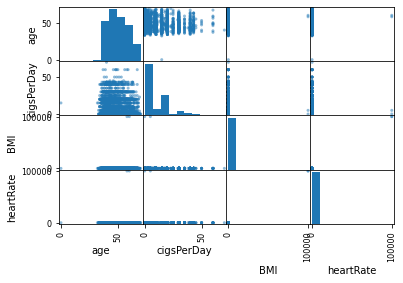

In [80]:
scatter_matrix(new)
plt.show()

In [75]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.568160,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,73.163383,123.001651,81.963655,0.151887
std,0.495027,8.606661,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,2175.906597,2170.225486,23.954335,0.358953
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,0.000000,0.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,99999.000000,99999.000000,394.000000,1.000000


In [51]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
raw_indices=data.loc[(data.values==99999).any(axis=1)].index.tolist()
print(raw_indices)

[198, 199]


In [ ]:
#No_of_missing_value = (df[[ 'age', 'cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate',]] ==0).sum() + (df[[' Glucose', 'BloodPressure', ' SkinThickness', ' Insulin',' BMI']] == 99999).sum() 
#No_of_missing_value

In [50]:
No_of_missing_value = (data[[ 'age', 'cigsPerDay','BMI','heartRate','glucose']] ==0).sum() + (data[[ 'age', 'cigsPerDay','BMI','heartRate','glucose']]==99999).sum() 
No_of_missing_value

age              1
cigsPerDay    2145
BMI              3
heartRate        3
glucose          0
dtype: int64

In [18]:
data.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [19]:
df=data[['totChol','BMI','heartRate']]

In [22]:
df=data[['totChol']]

In [23]:
df

,totChol
0,195.0
1,250.0
2,245.0
3,225.0
4,285.0
...,...
4235,248.0
4236,210.0
4237,269.0
4238,185.0


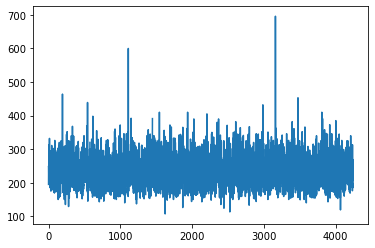

In [24]:
import matplotlib.pyplot as plt
plt.plot(df)

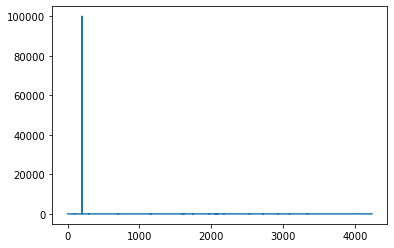

In [31]:
import matplotlib.pyplot as plt
df1=data[['BMI']]
plt.plot(df1)

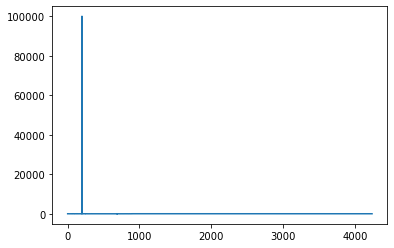

In [32]:
import matplotlib.pyplot as plt
df2=data[['heartRate']]
plt.plot(df2)

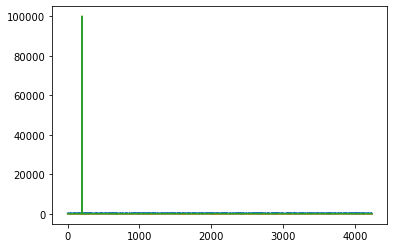

In [33]:

import matplotlib.pyplot as plt
df=data[['totChol','BMI','heartRate']]
plt.plot(df)

In [54]:
dataset = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']]

In [55]:
dataset

,education,age,cigsPerDay,BMI,heartRate,glucose
0,4.0,39,0.0,26.97,80.0,77.0
1,2.0,46,0.0,28.73,95.0,76.0
2,1.0,48,20.0,25.34,75.0,70.0
3,3.0,61,30.0,28.58,65.0,103.0
4,3.0,46,23.0,23.10,85.0,85.0
...,...,...,...,...,...,...
4235,2.0,48,20.0,22.00,84.0,86.0
4236,1.0,44,15.0,19.16,86.0,NaN
4237,2.0,52,0.0,21.47,80.0,107.0
4238,3.0,40,0.0,25.60,67.0,72.0


In [56]:
dataset.describe()

,education,age,cigsPerDay,BMI,heartRate,glucose
count,4135.000000,4240.000000,4211.000000,4221.000000,4239.000000,3852.000000
mean,1.979444,49.568160,9.005937,73.163383,123.001651,81.963655
std,1.019791,8.606661,11.922462,2175.906597,2170.225486,23.954335
min,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000
25%,1.000000,42.000000,0.000000,23.070000,68.000000,71.000000
50%,2.000000,49.000000,0.000000,25.400000,75.000000,78.000000
75%,3.000000,56.000000,20.000000,28.040000,83.000000,87.000000
max,4.000000,70.000000,70.000000,99999.000000,99999.000000,394.000000


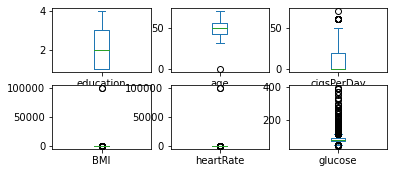

In [57]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

In [58]:
Data_outliers=(abs(dataset-dataset.mean())>3*dataset.std()).sum()
Data_outliers

education      0
age            1
cigsPerDay    21
BMI            2
heartRate      2
glucose       50
dtype: int64

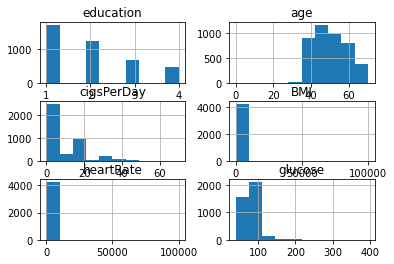

In [59]:
dataset.hist()
pyplot.show()

C:\Users\myneee101\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\myneee101\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


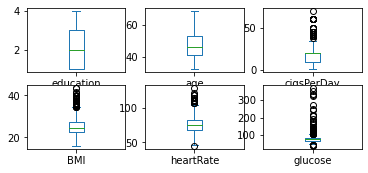

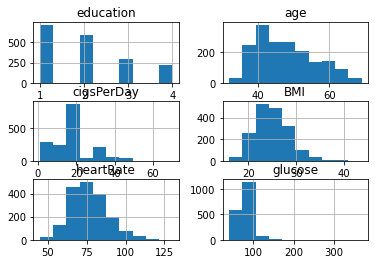

In [63]:
dataset[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = dataset[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(0, np.NaN)
dataset[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = dataset[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(99999, np.NaN)
dataset.dropna(inplace=True)
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
dataset.hist()
plt.show()

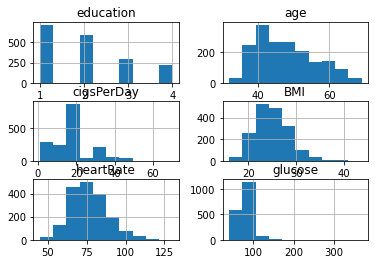

In [64]:
dataset.hist()
plt.show()

In [69]:
# Feature Extraction with PCA
from pandas import read_csv
from sklearn.decomposition import PCA
# load data
dataset.dropna(inplace=True)
array = dataset.values
X = array[:,0:5]
Y = array[:,5]
# feature extraction
pca = PCA(n_components=4)
fit = pca.fit(X)
# summarize components
print("Explained Variance:%s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance:[0.418 0.346 0.19  0.043]
[[-0.005 -0.01   0.338  0.04   0.94 ]
 [ 0.002 -0.107  0.935  0.013 -0.338]
 [-0.017  0.993  0.102  0.055 -0.029]
 [-0.025 -0.053 -0.032  0.997 -0.032]]


C:\Users\myneee101\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [70]:
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dataset.dropna(inplace=True)
array = dataset.values
X = array[:,0:5]
Y = array[:,5]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[ 45.533 154.824 645.836  66.723 219.703]


C:\Users\myneee101\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [71]:
newdata= dataset[[ 'age', 'cigsPerDay','BMI','heartRate']]

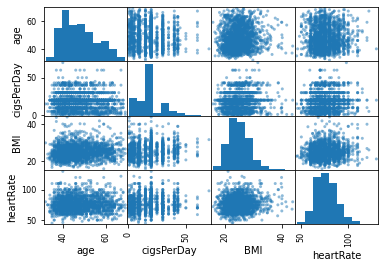

In [72]:
# scatter plot matrix
scatter_matrix(newdata)
plt.show()

In [84]:
import pandas as pd 
import numpy as np 
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split 
dataset.dropna(inplace=True)
array = dataset.values
X = array[:,0:5]
Y = array[:,5] 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1) 
models = [] 
models.append(('SVM', SVC(gamma='auto'))) 
results = [] 
names = [] 
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

C:\Users\myneee101\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


SVM: 0.052462 (0.010847)


In [85]:
data.fillna(data.mean(), inplace=True) 
#print(data.isnull().sum()) 
array = data.values 

In [92]:
import pandas as pd 
import numpy as np 
dataset.fillna(dataset.mean(), inplace=True) 
#print(data.isnull().sum()) 
array = dataset.values 
for i in range(len(array[0])):
    value_min = min(array [:,i]) 
    value_max = max(array [:,i]) 
    min_max = value_max - value_min 
    if (i != 3 and i != 5):
        array [:,i]= array [:,i]/ min_max
X = array[:,0:5] 
Y = array[:,5] 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1) 
models = [] 
models.append(('SVM', SVC(gamma='auto'))) 
results = [] 
names = [] 
for name, model in models: 
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

TypeError: 'float' object is not callable

In [94]:
# demonstrate that the train-test split procedure is repeatable
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_blobs(n_samples=500)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
models = [] 
models.append(('SVM', SVC(gamma='auto'))) 
results = [] 
names = [] 
for name, model in models: 
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.922500 (0.036142)


In [95]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [96]:
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.97
[[30  0  0]
 [ 3 34  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        30
           1       1.00      0.92      0.96        37
           2       1.00      1.00      1.00        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [97]:
import pandas as pd
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("framingham_Balu_edits.csv")
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(0, np.NaN)
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(99999, np.NaN)
data.dropna(inplace=True)

array = data.values
X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)

[2.230e-03 1.372e+01 1.538e-01 0.000e+00 1.868e+00 2.158e+00 9.994e-02
 3.846e+00]


In [3]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
data = pd.read_csv("framingham_Balu_edits.csv")
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(0, np.NaN)
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(99999, np.NaN)
data.dropna(inplace=True)
array = data.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)
models = []

models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
      kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
      cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
      results.append(cv_results)
      names.append(name)
      print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.981099 (0.003175)


In [101]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
data = pd.read_csv("framingham_Balu_edits.csv")
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(0, np.NaN)
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(99999, np.NaN)
data.dropna(inplace=True)
array = data.values
X = array[:,0:8]
Y = array[:,8]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)
models = []

models.append(('SVM', SVC(gamma='auto')))
results = []
names = []
for name, model in models:
      kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
      cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
      results.append(cv_results)
      names.append(name)
      print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.981099 (0.003175)


In [105]:
import pandas as pd 
import numpy as np 
data = pd.read_csv("framingham_Balu_edits.csv")
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(0, np.NaN)
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(99999, np.NaN)
#print(data.isnull().sum()) 
data.fillna(data.mean(), inplace=True)
array = data.values 
for i in [ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']:
    max=data[i].max()
    min=data[i].min()
    x=list((data[i]-min)/(max-min))
    data[i]=x
array = data.values   
X = array[:,0:8] 
Y = array[:,8] 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, 
random_state=1) 
models = [] 
models.append(('SVM', SVC(gamma='auto'))) 
results = [] 
names = [] 
for name, model in models: 
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.974942 (0.001460)


In [106]:
import pandas as pd 
import numpy as np 
data = pd.read_csv("framingham_Balu_edits.csv")
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(0, np.NaN)
data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']] = data[[ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']].replace(99999, np.NaN)
#print(data.isnull().sum()) 
data.fillna(data.mean(), inplace=True)
array = data.values 
for i in [ 'education','age', 'cigsPerDay','BMI','heartRate','glucose']:
    max=data[i].max()
    min=data[i].min()
    x=list((data[i]-min)/(max-min))
    data[i]=x
array = data.values   
X = array[:,0:6] 
Y = array[:,6] 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, 
random_state=1) 
models = [] 
models.append(('SVM', SVC(gamma='auto'))) 
results = [] 
names = [] 
for name, model in models: 
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True) 
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy') 
    results.append(cv_results) 
    names.append(name) 
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

SVM: 0.995284 (0.001442)
